In [1]:
import pandas as pd

In [7]:
data = pd.read_json('scrapped_dealls.json')
label = pd.read_csv('labeled_gemini_pro.csv')

data['jobs_id'] = data.index


,url,company_profile_src,company_name,job_position,employment_type,working_location_type,working_location,min_experience,salary,job_desc_list,job_qualification_list,company_desc,company_industry,company_location,company_employess_count,jobs_id
0,https://dealls.com/loker/front-end-developer-3...,https://cdn.sejutacita.id/64f7ee28f62e160013a6...,Bringin Inti Teknologi,Back End Developer,Penuh waktu,On-site,Jakarta,Min. 1 years of experience,Negotiable,"[Utilize languages like Go, PHP/Laravel, and P...",[Minimum Bachelor of Science in computer scien...,[We are an Integrated IT Solutions provider wi...,[Technology and Software Solutions],"[Jakarta Pusat, ,, , Indonesia]","[50–100, employees]",0
1,https://dealls.com/loker/freelance-sales-retai...,https://cdn.sejutacita.id/62fba7bb7cc7a000147e...,Torch.id,(Freelance) Sales Retail Mobile/Canvasser,Penuh waktu,On-site,Indonesia,Min. 1 years of experience,Negotiable,[Retail Sales Mobile akan bertanggung jawab un...,"[Pendidikan minimal SMA/SMK/sederajat., Memili...","[Torch.id is a prominent Indonesian brand, pro...",[Fashion & Apparel],"[Bandung, ,, , Indonesia]","[50–100, employees]",1
2,https://dealls.com/loker/creative-lead-2~aurah...,https://cdn.sejutacita.id/66b46d83438f440013dd...,Clerina Group,Creative Lead,Penuh waktu,On-site,Bandung,Min. 1 years of experience,Negotiable,"[1. Membuat laporan weekly & monthly, 2. Membe...",[1. Pendidikan minimal S1 Ilmu Komunikasi / Ma...,[Clerina Group merupakan company yang bergerak...,[Beauty and Cosmetics],"[Bandung, ,, , Indonesia]","[1–50, employees]",2
3,https://dealls.com/loker/social-media-speciali...,https://cdn.sejutacita.id/62fba7bb7cc7a000147e...,Torch.id,Social Media Specialist,Penuh waktu,On-site,Bandung,Min. 1 years of experience,Negotiable,[We are looking for a Social Media Specialist ...,"[Bachelor's degree in Marketing, Communication...","[Torch.id is a prominent Indonesian brand, pro...",[Fashion & Apparel],"[Bandung, ,, , Indonesia]","[50–100, employees]",3
4,https://dealls.com/loker/hrga-staff-area-padal...,https://cdn.sejutacita.id/665fd307c547c5001327...,Kharisma Potensia Indonesia,HRGA Staff area Padalarang Kabupaten Bandung B...,Kontrak,On-site,Bandung Barat Regency,Min. 1 years of experience,Rp3.500.000 – 3.508.677,[Membantu perekrutan dan pengelolaan operasion...,"[Pengalaman HRGA minimal 1 Tahun, Memiliki kem...",[PT KHARISMA POTENSIA INDONESIA Committed to b...,[Human Resources and Consulting],"[Jakarta, ,, , Indonesia]","[>100, employees]",4


In [11]:
label

,jobs_id,job_position,kategori
0,0,Back End Developer,['Software Engineering']
1,1,(Freelance) Sales Retail Mobile/Canvasser,"['Sales', 'Retail']"
2,2,Creative Lead,"['Creative & Design', 'Management & Leadership']"
3,3,Social Media Specialist,"['Marketing', 'Creative & Design']"
4,4,HRGA Staff area Padalarang Kabupaten Bandung B...,"['Human Resources', 'Administrative & Secretar..."
...,...,...,...
3191,3191,Batching Plant Leader,"['Production & Manufacturing', 'Management & L..."
3192,3192,Content Creator Talent,"['Creative & Design', 'Marketing']"
3193,3193,Online Sales Executive,"['Sales', 'E-commerce']"
3194,3194,Complaint Expert Specialist,"['Customer Service & Support', 'Risk Management']"


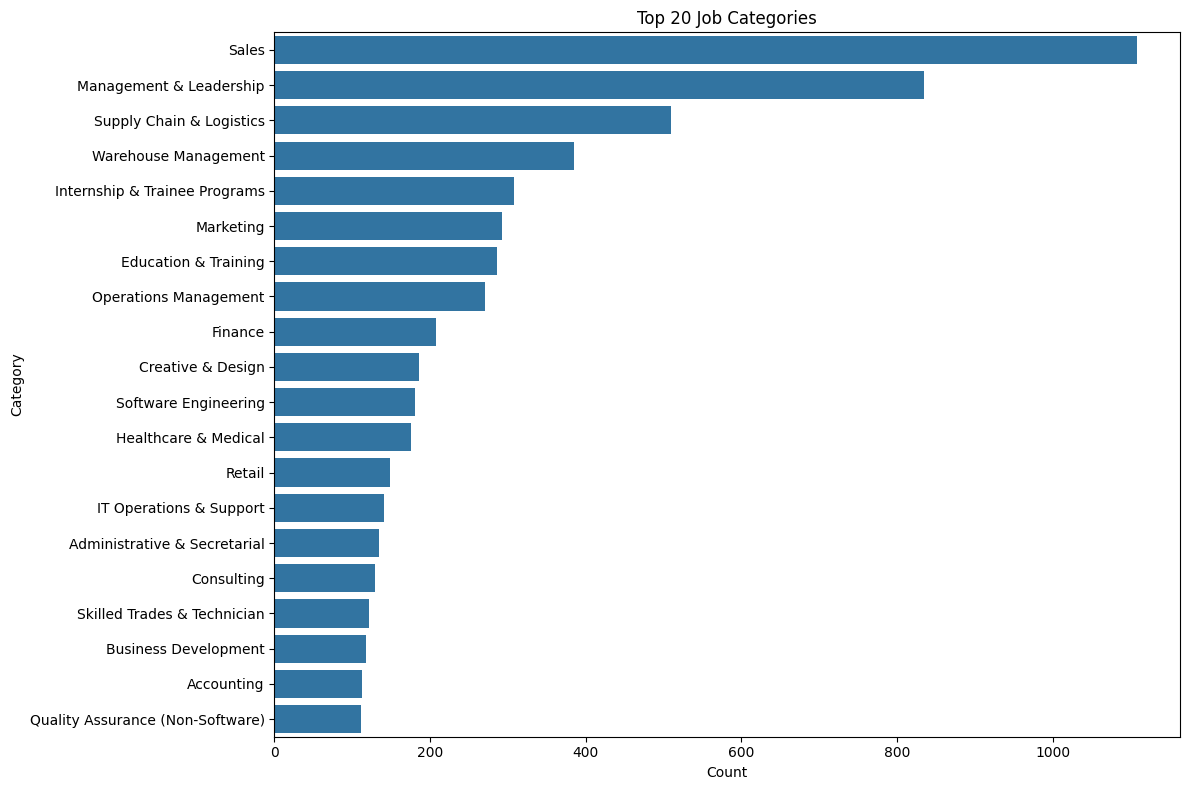

Total unique categories: 51

Top 10 most common categories:
                         Category  Count
1                           Sales   1108
4         Management & Leadership    835
37       Supply Chain & Logistics    510
40           Warehouse Management    385
15  Internship & Trainee Programs    308
5                       Marketing    293
30           Education & Training    286
24          Operations Management    270
12                        Finance    208
3               Creative & Design    186


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

# Extract categories from string representation
all_categories = []
for category_str in label['kategori']:
    # Remove square brackets and split by commas
    if pd.notna(category_str):
        # Try to safely evaluate the string as a literal
        try:
            # Handle string that looks like a list
            if isinstance(category_str, str) and '[' in category_str:
                # Remove brackets and split by comma
                categories = category_str.strip('[]').replace("'", "").split(',')
                categories = [c.strip() for c in categories]
                all_categories.extend(categories)
        except:
            # Fallback if parsing fails
            continue

# Count occurrences
category_counts = Counter(all_categories)

# Convert to DataFrame for visualization
category_df = pd.DataFrame({
    'Category': list(category_counts.keys()),
    'Count': list(category_counts.values())
}).sort_values('Count', ascending=False)

# Visualize the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Category', data=category_df.head(20))
plt.title('Top 20 Job Categories')
plt.tight_layout()
plt.show()

# Print statistics
print(f"Total unique categories: {len(category_counts)}")
print("\nTop 10 most common categories:")
print(category_df.head(10))

In [15]:
category_df

,Category,Count
1,Sales,1108
4,Management & Leadership,835
37,Supply Chain & Logistics,510
40,Warehouse Management,385
15,Internship & Trainee Programs,308
5,Marketing,293
30,Education & Training,286
24,Operations Management,270
12,Finance,208
3,Creative & Design,186
